In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:.2f}'.format

# Load dataset
data_sup = pd.read_csv('cleaned_recipes_.csv')
print("Dataset Loaded Successfully")

Dataset Loaded Successfully


In [2]:
data_sup.head(10)

,RecipeId,Name,CookTime,RecipeServings,RecipeCategory,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions,HealthStatus
0,38,Low-Fat Berry Blue Frozen Dessert,1 day,4.00,Frozen Desserts,"['4', '1/4', '1', '1']","blueberries, granulated sugar, vanilla yogurt,...",4.50,170.90,2.50,1.30,8.00,29.80,37.10,3.60,30.20,3.20,"['Toss 2 cups berries with sugar.', 'Let stand...",Unhealthy because of : SugarContent
1,39,Biryani,25 minutes,6.00,Chicken Breast,[],"saffron, milk, hot green chili peppers, onions...",3.00,1110.70,58.80,16.60,372.80,368.40,84.40,9.00,20.40,63.40,['Soak saffron in warm milk for 5 minutes and ...,Unhealthy because of : FatContent
2,40,Best Lemonade,5 minutes,4.00,Beverages,[],"sugar, lemons, rind of, lemon, zest of, fresh ...",4.50,311.10,0.20,0.00,0.00,1.80,81.50,0.40,77.20,0.30,"['Into a 1 quart Jar with tight fitting lid, p...",Unhealthy because of : SugarContent
3,41,Carina's Tofu-Vegetable Kebabs,20 minutes,2.00,Soy/Tofu,"['12', '1', '2', '1', '10', '1', '3', '2', '2'...","extra firm tofu, eggplant, zucchini, mushrooms...",4.50,536.10,24.00,3.80,0.00,1558.60,64.20,17.30,32.10,29.30,"['Drain the tofu, carefully squeezing out exce...",Moderate because of :FatContent
4,42,Cabbage Soup,30 minutes,4.00,Vegetable,"['46', '4', '1', '2', '1']","plain tomato juice, cabbage, onion, carrots, c...",4.50,103.60,0.40,0.10,0.00,959.30,25.10,4.80,17.70,4.30,['Mix everything together and bring to a boil....,Moderate because of :SodiumContent
5,43,Best Blackbottom Pie,2 hours,8.00,Pie,[],"graham cracker crumbs, sugar, butter, sugar, c...",1.00,437.90,19.30,10.90,94.30,267.60,58.00,1.80,42.50,7.00,"['Graham Cracker Crust: In small bowl, combine...",Moderate because of :SaturatedFatContent
6,44,Warm Chicken A La King,3 minutes,2.00,Chicken,[],"chicken, butter, flour, milk, celery, button m...",5.00,895.50,66.80,31.90,405.80,557.20,29.10,3.10,5.00,45.30,"['Melt 1 1/2 ozs butter, add the flour and coo...",Unhealthy because of : FatContent
7,45,Buttermilk Pie With Gingersnap Crumb Crust,50 minutes,8.00,Pie,"['3/4', '1', '1', '2', '3', '1/4', '1', '1/2',...","sugar, margarine, egg, flour, salt, buttermilk...",4.00,228.00,7.10,1.70,24.50,281.80,37.50,0.50,24.70,4.20,"['Preheat oven to 350°F.', 'Make pie crust, us...",Moderate because of :SugarContent
8,48,Boston Cream Pie,unknown,8.00,Pie,"['1/2', '2 1/4', '3', '1', '1 1/2', '1/3', '1 ...","margarine, cake flour, baking powder, salt, su...",2.00,688.20,36.40,12.90,105.90,722.30,84.00,1.60,46.20,8.80,"['Beat egg whites until soft peaks form.', 'Gr...",Unhealthy because of : FatContent
9,49,Chicken Breasts Lombardi,30 minutes,6.00,Chicken Breast,"['2', '2', '12', '1/2', '1/3', '3/4', '1/2', '...","fresh mushrooms, butter, boneless skinless chi...",5.00,627.70,24.90,13.00,203.00,848.90,13.70,0.60,2.00,57.90,['Cook mushrooms in 2 tbsp butter in a large ...,Moderate because of :FatContent


In [3]:
# Define a cleaning function
def clean_ingredients(ingredient_str):
    # Remove 'c (' and ')', and clean double quotes and spaces
    ingredient_str = ingredient_str.replace('c(', '').replace(')', '')  # Remove 'c (' and ')'
    ingredient_str = ingredient_str.replace('"', '')  # Remove double quotes
    ingredient_str = ' '.join(item.strip() for item in ingredient_str.split(','))  # Clean spaces and join
    return ingredient_str

In [4]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier

scaled_data = data_sup.copy()
 
# Extract only the relevant features

# Apply the cleaning function to the Ingredients column
Ingredients = scaled_data['RecipeIngredientParts']
labels = scaled_data['HealthStatus']


# Output the cleaned Ingredients
Ingredients


0         blueberries, granulated sugar, vanilla yogurt,...
1         saffron, milk, hot green chili peppers, onions...
2         sugar, lemons, rind of, lemon, zest of, fresh ...
3         extra firm tofu, eggplant, zucchini, mushrooms...
4         plain tomato juice, cabbage, onion, carrots, c...
                                ...                        
339116    lemon wedge, granulated sugar, cognac, brandy,...
339117    all-purpose flour, brown sugar, butter, ground...
339118    fresh ginger, unsalted butter, dark brown suga...
339119    Dijon mustard, garlic, peppercorns, shallot, c...
339120            half-and-half, heavy cream, brandy, sugar
Name: RecipeIngredientParts, Length: 339121, dtype: object

In [5]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(Ingredients)


In [6]:
# Modèle KNN
knn = KNeighborsClassifier( metric='cosine')
knn.fit(X, labels)

KNeighborsClassifier(metric='cosine')

In [7]:
# Nouvelle recette utilisateur
user_recipe = ["eggs onion"]
user_vector = vectorizer.transform(user_recipe)
# Find the Most Similar Recipe Index

_, index = knn.kneighbors(user_vector)
most_similar_index = index[0][0]
# Return the Index
print(f"Index of the nearest recipe: {most_similar_index}")

Index of the nearest recipe: 28441


In [8]:
# Prédiction
prediction = knn.predict(user_vector)
print(f"La recette est : {prediction[0]}")
most_similar_row = scaled_data.iloc[most_similar_index]
print(f"La recette la plus similaire : {most_similar_row['RecipeIngredientParts']}")




La recette est : Healthy
La recette la plus similaire : onion, eggs


In [9]:
from sklearn.utils import resample

X_test_sample, y_test_sample = resample(X, labels, n_samples=1000, random_state=42)
accuracy = knn.score(X_test_sample, y_test_sample)


In [10]:
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 57.70%


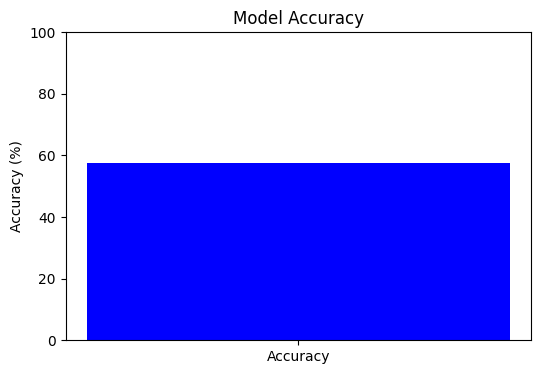

In [11]:
# Plot Accuracy
plt.figure(figsize=(6, 4))
plt.bar(["Accuracy"], [accuracy * 100], color='blue')
plt.ylim(0, 100)
plt.title("Model Accuracy")
plt.ylabel("Accuracy (%)")
plt.show()

In [12]:
import joblib

joblib.dump(vectorizer, 'supervise_vectorizer_.pkl')

joblib.dump(knn, 'knn_supervised_model_.pkl')


['knn_supervised_model_.pkl']